In [4]:
import pandas as pd
df = pd.read_csv('co2_emission_coursera.csv')
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
973,2014,TOYOTA,COROLLA,MID-SIZE,1.8,4,AV7,X,8.1,6.3,7.3,39,168
338,2014,FIAT,500 HATCHBACK,MINICOMPACT,1.4,4,M5,X,7.6,5.9,6.8,42,156
498,2014,HONDA,ODYSSEY,MINIVAN,3.5,6,A6,X,12.3,8.5,10.6,27,244
335,2014,FIAT,500 CABRIO,MINICOMPACT,1.4,4,M5,X,7.9,6.3,7.2,39,166
477,2014,GMC,YUKON XL,SUV - STANDARD,5.3,8,A6,X,16.0,11.1,13.8,20,317


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
df = df.drop(columns=['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS','TRANSMISSION','FUELTYPE'], axis=1)


KeyError: "['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'] not found in axis"

In [9]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [10]:
df = df.drop(columns=['CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'],axis=1)
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


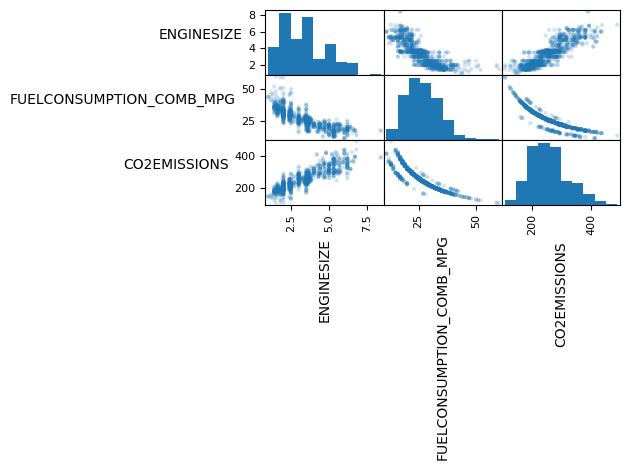

In [11]:
import matplotlib.pyplot as plt

axes = pd.plotting.scatter_matrix(df,alpha=0.2)
for ax in axes.flatten():
  ax.xaxis.label.set_rotation(90)
  ax.yaxis.label.set_rotation(0)
  ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [13]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()


(1067, 1)

In [15]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [16]:
from sklearn.model_selection import train_test_split
train_X , test_X, train_y, test_y = train_test_split(X_std,y,test_size =0.2,random_state=42)
train_X.shape

(853, 2)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regression = LinearRegression()
regression.fit(train_X,train_y)

y_hat = regression.predict(test_X)
print(f'Coefficients: {regression.coef_}')
print(f'Intercept: {regression.intercept_}\n')
print(f'MSE: {mean_squared_error(y_hat, test_y)}')
print(f'R2 Error: {r2_score(y_hat,test_y)}')

Coefficients: [[ 25.27339614 -37.4381472 ]]
Intercept: [256.29072488]

MSE: 466.11311996611664
R2 Error: 0.8800693382302519


In [20]:
import numpy as np
means_ = std_scaler.mean_
std_dev = np.sqrt(std_scaler.var_)

coef_original = regression.coef_ / std_dev
intercept_original = regression.intercept_ - np.sum((means_ * regression.coef_) / std_dev)

print(f'Original coeffs: {coef_original}')
print(f'Original intercept: {intercept_original}')

Original coeffs: [[17.8581369  -5.01502179]]
Original intercept: [329.1363967]


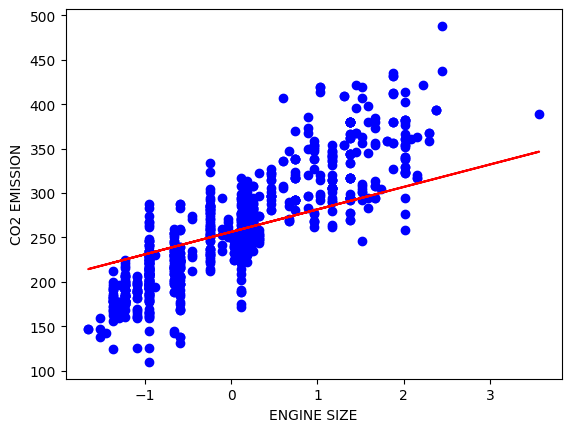

In [24]:
import matplotlib.pyplot as plt
plt.scatter(train_X[:,0],train_y, color='blue')
plt.plot(train_X[:,0], regression.coef_[0,0] * train_X[:,0] + regression.intercept_, '-r')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSION")
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
train_X1 = train_X[:,0]
regr = LinearRegression()

regr.fit(train_X1.reshape(-1,1), train_y)
coef = regr.coef_
intercept = regr.intercept_
print(f'Coefficients: {coef}')
print(f'Intercept: {intercept}\n')

Coefficients: [[55.18408797]]
Intercept: [256.77183014]



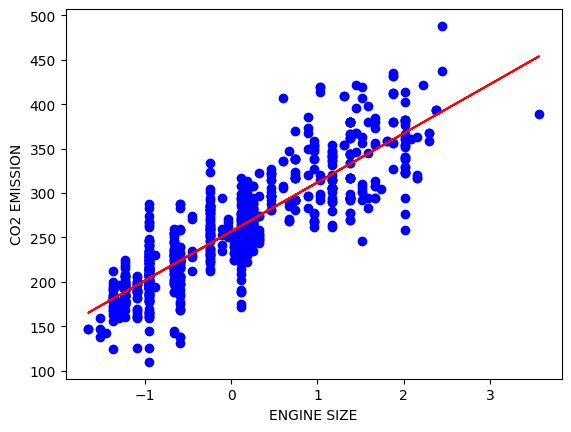

In [29]:
plt.scatter(train_X1, train_y, color='blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSION")
plt.plot(train_X1, coef[0] * train_X1 + intercept, '-r')
plt.show()

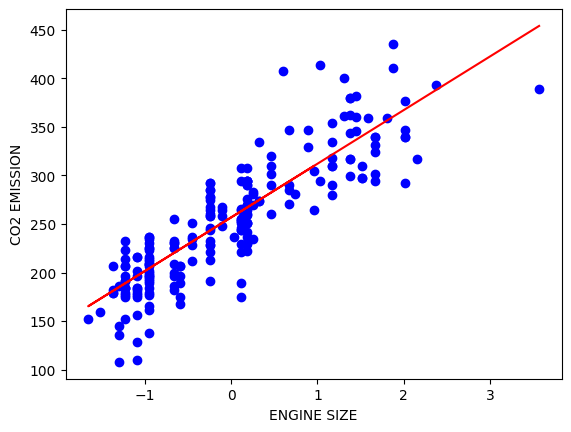

In [33]:
plt.scatter(test_X[:,0], test_y,color='blue')
plt.plot(test_X[:,0], coef[0] * test_X[:,0] + intercept,'-r')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSION")
plt.show()

In [35]:
train_X2 = train_X[:,1]

regr_2 = LinearRegression()
regr_2.fit(train_X2.reshape(-1,1),train_y)
coef_2 = regr_2.coef_
intercept_2 = regr_2.intercept_

print(f'Coefficients: {coef_2}')
print(f'Intercept: {intercept_2}\n')

Coefficients: [[-58.51827989]]
Intercept: [256.09392179]



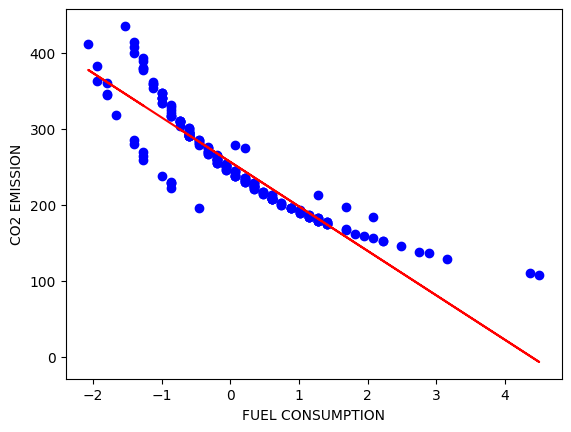

In [41]:
plt.scatter(test_X[:,1], test_y,color='blue')
plt.xlabel("FUEL CONSUMPTION")
plt.ylabel("CO2 EMISSION")
plt.plot(test_X[:,1], coef_2[0] * test_X[:,1] + intercept_2,'-r')
plt.show()